# Ebola Spread and Interventions in Liberia

## ***Classes of Individuals***

S (susceptible individuals who can be infected by Ebola virus following a contact with infectious cases)

V (vaccinated individuals) 

E_1 (latent undetectable individuals) 

E_2 (latent detectable individuals) 

I (infectious individuals with symptoms) 

J (isolated individuals) 

D (individuals who are dead but have not been buried; they can still transmit the disease during funerals) 

R (recovered individuals)

## ***Parameters***

N = Size of the total population

1/k1 = Mean time from latent undetectable class to latent detectable class

1/k2 = Mean time from latent detectable class to infectious symptomatic class

1/alpha1 = Mean time from infectious symptomatic class to isolated class

1/gamma1 = Mean time that infectious individuals are removed by recovery or disease induced death

1/gamma_r = Mean time that isolated individuals are removed by recovery or disease induced death

1/gamma_D = Mean time from death to traditional burial

beta_reg = Human-to-human transmission rate

beta_D =  Transmission rate during funeral

epsilon1 = Relative transmissibility of isolated individuals

delta1 = Case fatality rate

f_T = The rate at which latent detectable individuals progress to the isolation class

xi = The vaccination rate

n = The efficacy of vaccination

R_o = Basic reproduction number

**Model 1**

I will start by examining the effect of no media coverage on the spread of the virus. When the media cannot inform people to take precautions, the virus spreads much quicker.

# ***Pre-media, Vaccinated model***

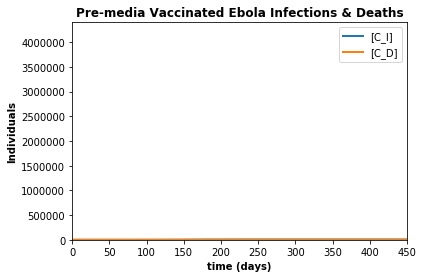

Total deaths = 0.0003743498899190289
Total cases = 2927.744257927774


In [23]:
import tellurium as te

model_1 = '''
    //Equations
    E1: S -> V ; xi * S ;
    E2: S -> E_1 ; ((beta_reg*I*S)+(beta_reg*epsilon1*J*S)+(beta_D*D*S))/N ;
    E3: V -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*(n*V))/N ;
    E4: E_1 -> E_2 ; k1*E_1 ;
    E5: E_2 -> I ; k2*E_2 ;
    E6: E_2 -> J ; f_T*E_2 ;
    E7: I -> J ; alpha1*I ;
    E8: I -> R ; (1-delta1)*(gamma1*I) ;
    E9: J -> R ; (1-delta1)*(gamma_r*J) ;
    E10: J -> D ; delta1*gamma_r*J ;
    E11: I -> D ; delta1*gamma1*I ;
    E12: D -> ; gamma_D*D ;
    
    E13: -> C_I ; (k2 + f_T)*E_2;
    E14: -> C_D ; (delta1*gamma1*I)+(delta1*gamma_r*J) ;
    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.3500 //avg transmission rate pre-media
    epsilon1 = 0.5649
    beta_D = 0.2986 //dead transition rate pre-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 1.3E-3
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6/500 ; //Population of Liberia
    S = N ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E_1 = 0 ; // None undetectable latent
    E_2 = 0 ; // None detectable latent
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start 
     
'''

m = te.loada(model_1)
#s = m.simulate(0, 450, 100, ['time', '[D]', '[S]', '[R]', '[V]'])
s = m.simulate(0, 450, 100, ['time', '[C_I]', '[C_D]'])
m.plot(title = "Pre-media Vaccinated Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450], ylim = [0,4.4E6])

print('Total deaths =', m.D)
print('Total cases =', m.D+m.R)    

**Model 2**

The second model assumes media intervention, meaning that people will (likely) take precautions and the spread will slow.

# ***Post-media, Vaccinated model***

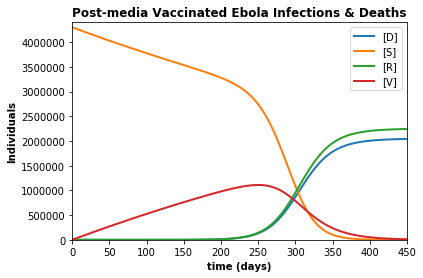

Total deaths = 2040766.1245149183
Total cases = 4282825.025214939


In [19]:
import tellurium as te

model_2 = '''
    //Equations
    E1: S -> V ; xi * S ;
    E2: S -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*S)/N ;
    E3: V -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*(n*V))/N ;
    E4: E_1 -> E_2 ; k1*E_1 ;
    E5: E_2 -> I ; k2*E_2 ;
    E6: E_2 -> J ; f_T*E_2 ;
    E7: I -> J ; alpha1*I ;
    E8: I -> R ; (1-delta1)*(gamma1*I) ;
    E9: J -> R ; (1-delta1)*(gamma_r*J) ;
    E10: J -> D ; delta1*gamma_r*J ;
    E11: I -> D ; delta1*gamma1*I ;
    //E12: D -> E_1 ; gamma_D*D ;
    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.1701 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.1214 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 1.3E-3
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6 ; //Population of Liberia
    S = N-I ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E_1 = 0 ; // One undetectable infected
    E_2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start    
     
'''

m = te.loada(model_2)
s = m.simulate(0, 450, 100, ['time', '[D]', '[S]', '[R]', '[V]'])
m.plot(title = "Post-media Vaccinated Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450], ylim = [0,4.4E6])
print('Total deaths =', m.D)
print('Total cases =', m.D+m.R)

# ***Post-media, Unvaccinated model***

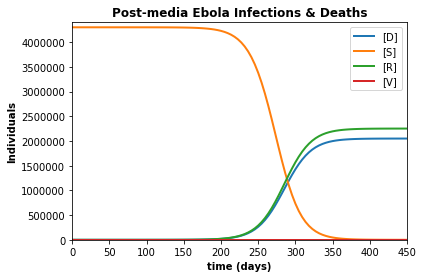

Total deaths =  2048786.029503171
Total cases =  4299655.885630997


In [20]:
import tellurium as te

model_2 = '''
    //Equations
    E1: S -> V ; xi * S ;
    E2: S -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*S)/N ;
    E3: V -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*(n*V))/N ;
    E4: E_1 -> E_2 ; k1*E_1 ;
    E5: E_2 -> I ; k2*E_2 ;
    E6: E_2 -> J ; f_T*E_2 ;
    E7: I -> J ; alpha1*I ;
    E8: I -> R ; (1-delta1)*(gamma1*I) ;
    E9: J -> R ; (1-delta1)*(gamma_r*J) ;
    E10: J -> D ; delta1*gamma_r*J ;
    E11: I -> D ; delta1*gamma1*I ;
    //E12: D -> E_1 ; gamma_D*D ;
    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.1701 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.1214 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 0.00
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6 ; //Population of Liberia
    S = N-I ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E_1 = 0 ; // One undetectable infected
    E_2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start    
     
'''

m = te.loada(model_2)
s = m.simulate(0, 450, 100, ['time', '[D]', '[S]', '[R]', '[V]']) 
m.plot(title = "Post-media Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450], ylim = [0,4.4E6])
print('Total deaths = ', m.D)
print('Total cases = ', m.D+m.R)

# ***References***


**Tellurium**

Somogyi, Andy T (2019), "tellurium," https://nanohub.org/resources/tellurium. (DOI: 10.21981/EVG3-D766).

Medley et al. (2018). "Tellurium notebooks—An environment for reproducible dynamical modeling in systems biology." PLoS Computational Biology, 14(6), e1006220.

Choi et al. (2018). "Tellurium: An extensible python-based modeling environment for systems and synthetic biology." Biosystems, 171, 74-79.

**Articles**

Xia, ZQ., Wang, SF., Li, SL. et al. Modeling the transmission dynamics of Ebola virus disease in Liberia. Sci Rep 5, 13857 (2015). https://doi.org/10.1038/srep13857

Shen, M., Xiao, Y. & Rong, L. Modeling the effect of comprehensive interventions on Ebola virus transmission. Sci Rep 5, 15818 (2015). https://doi.org/10.1038/srep15818




# ***Sliders adjusting for Vaccination Rate and Efficacy***

In [22]:
import tellurium as te
import ipywidgets as widgets
from IPython import display
from IPython.display import clear_output
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt

model_1 = '''
    //Equations
    E1: S -> V ; xi * S ;
    E2: S -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*S)/N ;
    E3: V -> E_1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*(n*V))/N ;
    E4: E_1 -> E_2 ; k1*E_1 ;
    E5: E_2 -> I ; k2*E_2 ;
    E6: E_2 -> J ; f_T*E_2 ;
    E7: I -> J ; alpha1*I ;
    E8: I -> R ; (1-delta1)*(gamma1*I) ;
    E9: J -> R ; (1-delta1)*(gamma_r*J) ;
    E10: J -> D ; delta1*gamma_r*J ;
    E11: I -> D ; delta1*gamma1*I ;
    E12: D -> E_1 ; gamma_D*D ;
    
    E13: -> C_I ; (k2 + f_T)*E_2;
    E14: -> C_D ; (delta1*gamma1*I)+(delta1*gamma_r*J) ;
    
    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.1701 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.1214 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 1.3E-3
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6 ; //Population of Liberia
    S = N-I ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E_1 = 0 ; // One undetectable infected
    E_2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start 
     
''' 
#print("VaccEfficacy is how effective the vaccine is (percentage)")
#print("Data shows VaccEfficacy as 0.55, we can adjust from there\n")
#print("VaccRate is the rate at which people in Liberia get vaccinated")
#print("Data shows VaccRate as 0.0013, we can adjust from there\n")


button1 = widgets.Button(desciption = "Fitted Values")
display(button1)

def reset_button_clicked(b):
    clear_output(wait=True)
    button1 = widgets.Button(desciption = "Fitted Values")
    display(button1)
    interact(plotIndv, VaccEfficacy = widgets.FloatSlider(min = 0.00, max = 1.00, step = 0.02, value = 0.55, continuous_update=False), 
         VaccRate = widgets.FloatSlider(min = 0.0000, max = 0.0050, step = 0.0001, value = 0.0013, readout_format = '.4f', continuous_update=False))
    button.on_click(reset_button_clicked)   
button.on_click(reset_button_clicked)


def plotIndv(VaccEfficacy, VaccRate):
    m = te.loada(model_1)
    m.n = 1-VaccEfficacy
    m.xi = VaccRate
    s = m.simulate(0, 2000, 2000, ['time', 'C_D', 'C_I'])
    plt.xlabel('time (days)')
    plt.ylabel('Individuals')
    plt.ylim([0,6E6])
    plt.xlim([0,2000])
    plt.plot(s['C_D'], label = "Total Deaths")
    plt.plot(s['C_I'], label = "Total Cases")
    #plt.plot(s['S'], label = "Susceptible")
    #plt.plot(s['R'], label = "Recovered")
    #plt.plot(s['D'], label = "Deaths")
    #plt.plot(s['V'], label = "Vaccinated")
    plt.legend(loc="upper right")
    plt.show()
    print(m.C_I)
    
    
interact(plotIndv, VaccEfficacy = widgets.FloatSlider(min = 0.00, max = 1.00, step = 0.02, value = 0.55, continuous_update=False), 
         VaccRate = widgets.FloatSlider(min = 0.0000, max = 0.0050, step = 0.0001, value = 0.0013, readout_format = '.4f', continuous_update=False))


    

TypeError: 'module' object is not callable